In [1]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Download dataset (first time only — it's cached afterward)
path = kagglehub.dataset_download("sumedh1507/bmw-car-sales-dataset")
print(path)


C:\Users\qinha\.cache\kagglehub\datasets\sumedh1507\bmw-car-sales-dataset\versions\1


In [3]:
# Load the file into a DataFrame

df = pd.read_csv(f"{path}/BMW_Car_Sales_Classification.csv")
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [4]:
# Quick check of shape and missing values

print('Dataset shape:', df.shape)
print('Missing values per columns:', df.isnull().sum())

Dataset shape: (50000, 11)
Missing values per columns: Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64


In [5]:
# Handle duplicates
df.drop_duplicates(inplace=True)

Data Visualization

Distribution of numerical features

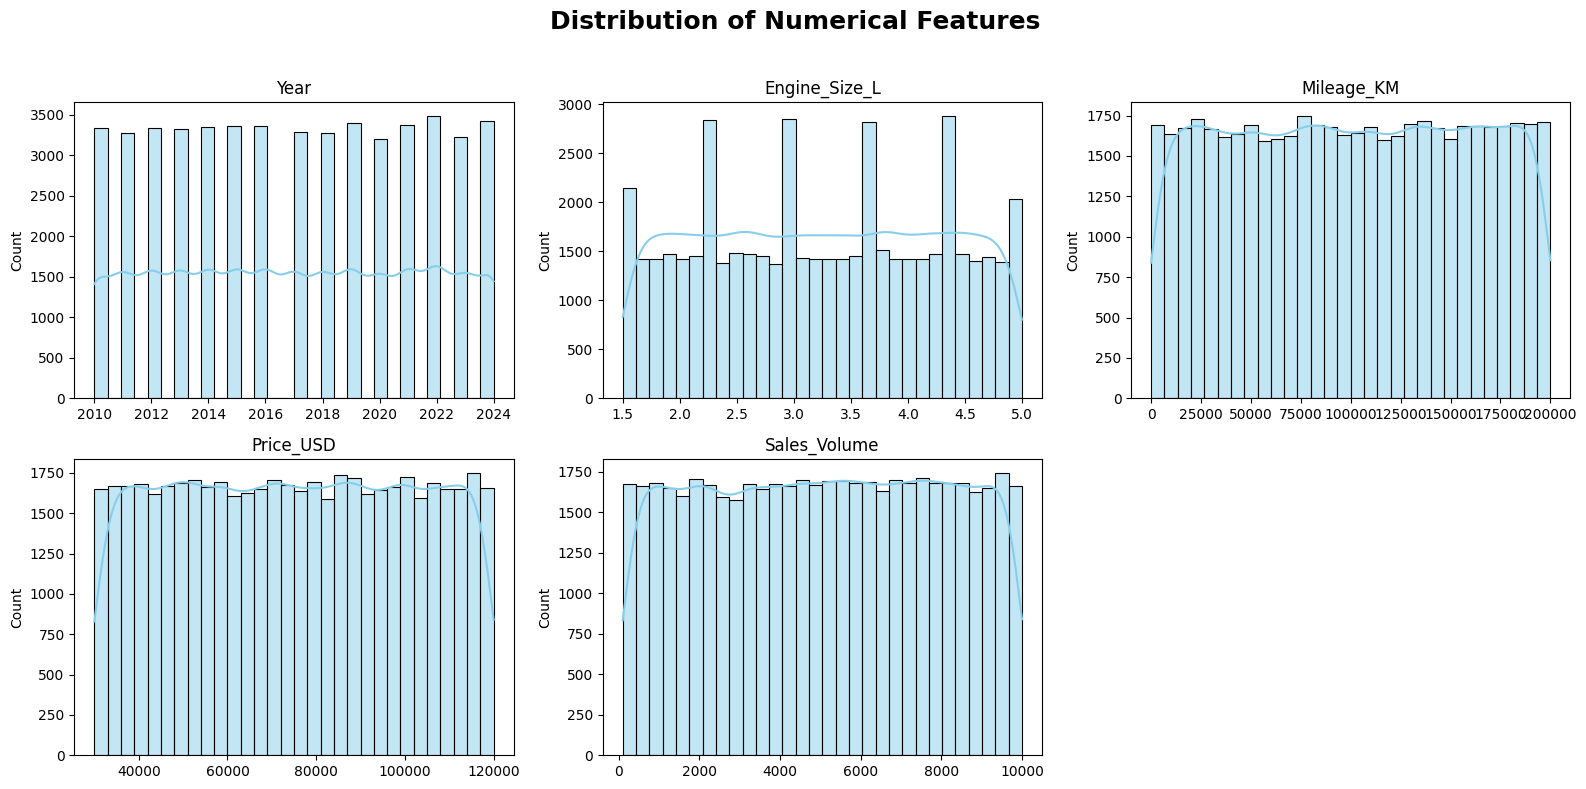

In [6]:
import math
# Select numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Decide grid size based on number of numeric columns
n_cols = 3  # number of plots per row
n_rows = math.ceil(len(num_cols) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each numeric column
for i, col in enumerate(num_cols):
    sns.histplot(df[col].dropna(), bins=30, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'{col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a big shared title
fig.suptitle('Distribution of Numerical Features', fontsize=18, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # make space for suptitle
plt.show()


Distribution of categorical features

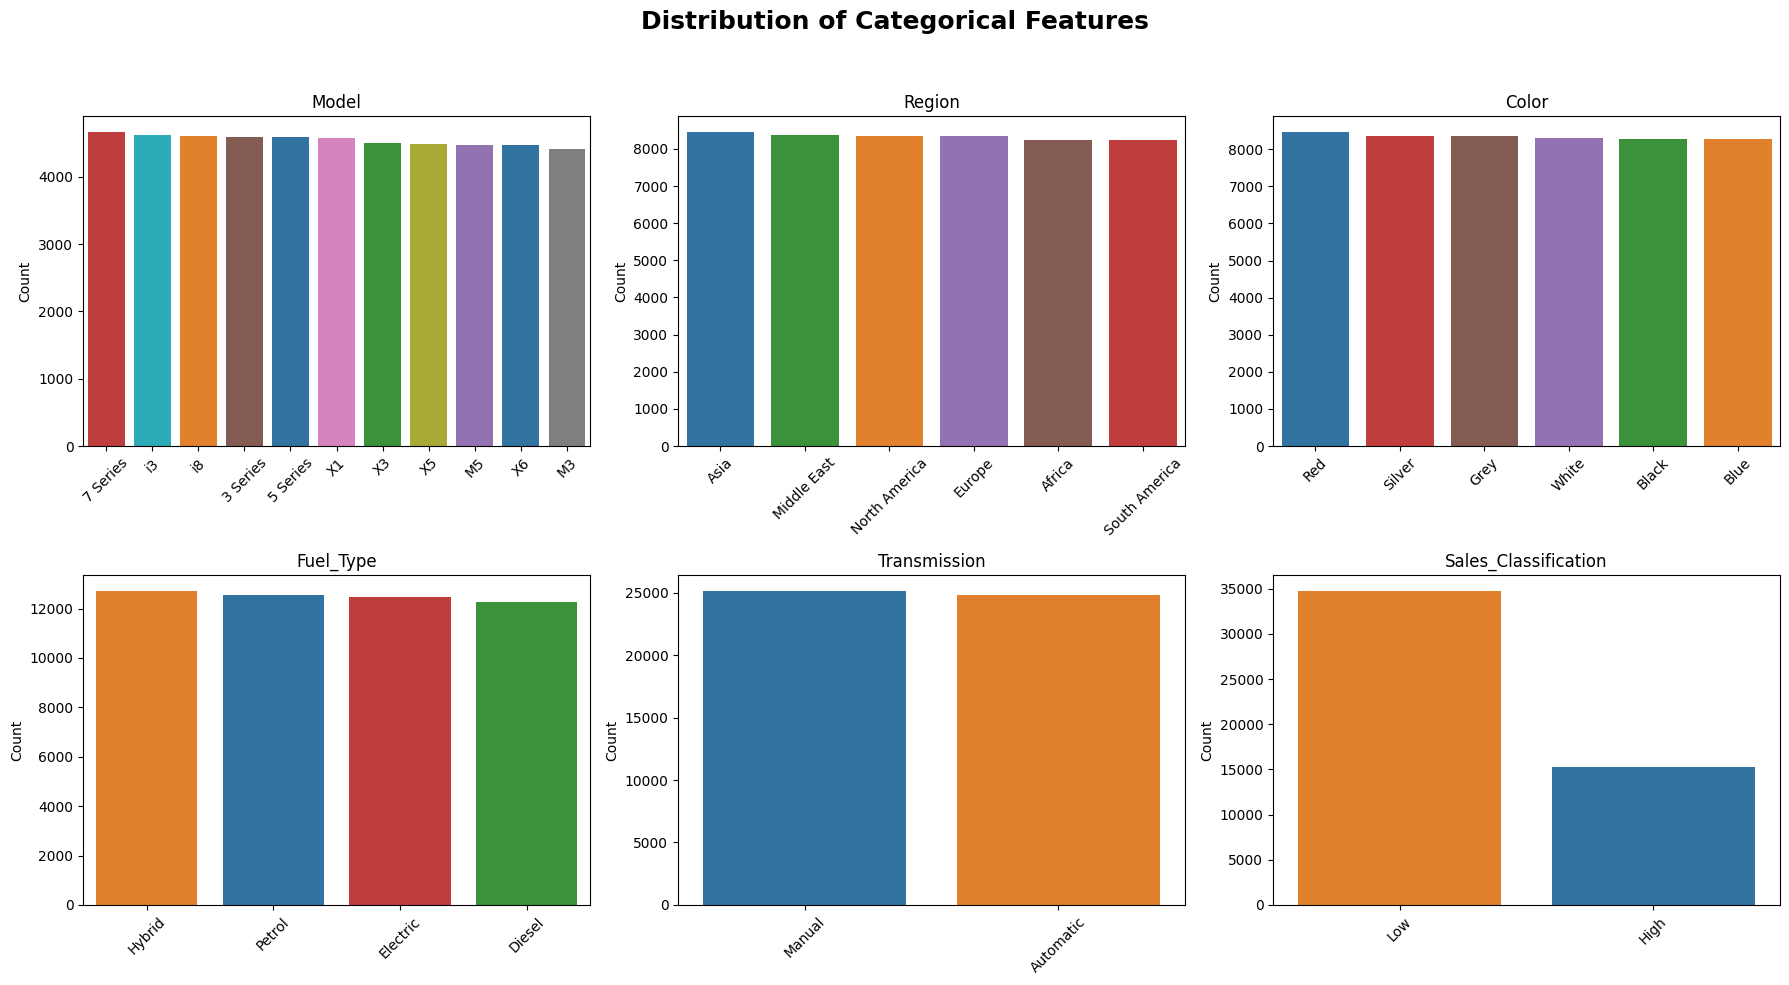

In [7]:
# Select categorical columns
cat_col = df.select_dtypes(include='object').columns

# Define grid layout
n_cols = 3  # number of plots per row
n_rows = math.ceil(len(cat_col) / n_cols)

# Create figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
axes = axes.flatten()

# Plot each categorical column
for i, col in enumerate(cat_col):
    sns.countplot(
        data=df,
        x=col,
        hue= col,
        order=df[col].value_counts().index,  # sort by frequency
        palette='tab10',
        ax=axes[i],
        legend=False
    )
    axes[i].set_title(f'{col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots (if total < grid size)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add one shared title
fig.suptitle('Distribution of Categorical Features', fontsize=18, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Sales by year

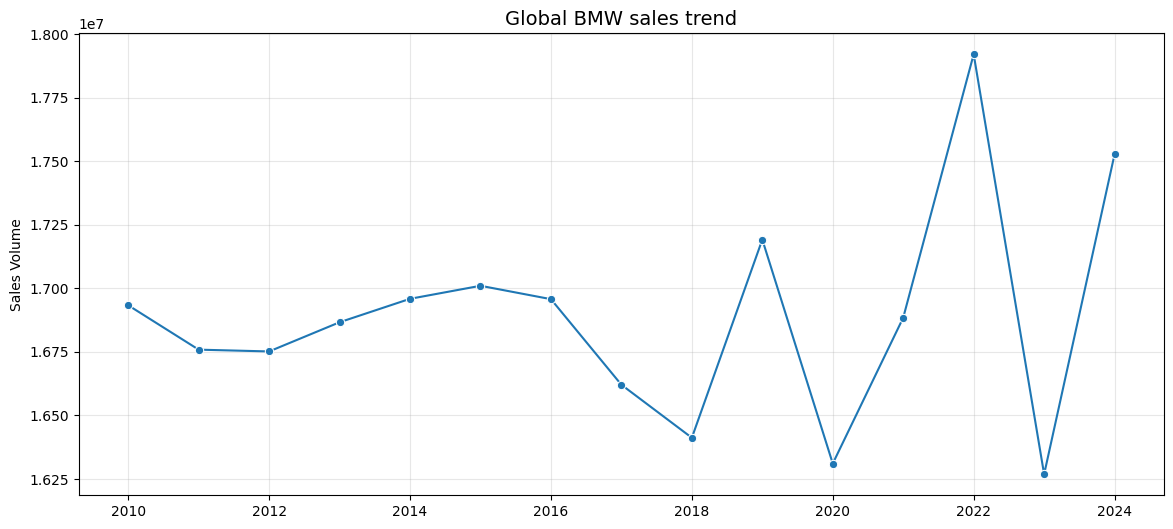

In [8]:
sum_sales_by_year = df.groupby('Year')['Sales_Volume'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(14,6))

sns.lineplot(data=sum_sales_by_year, 
             x='Year', 
             y='Sales_Volume', 
             marker='o'
             )

plt.title('Global BMW sales trend', fontsize= 14)
plt.xlabel('')
plt.ylabel('Sales Volume')
plt.grid(True, alpha=0.3)
plt.show()

Sales volume by region

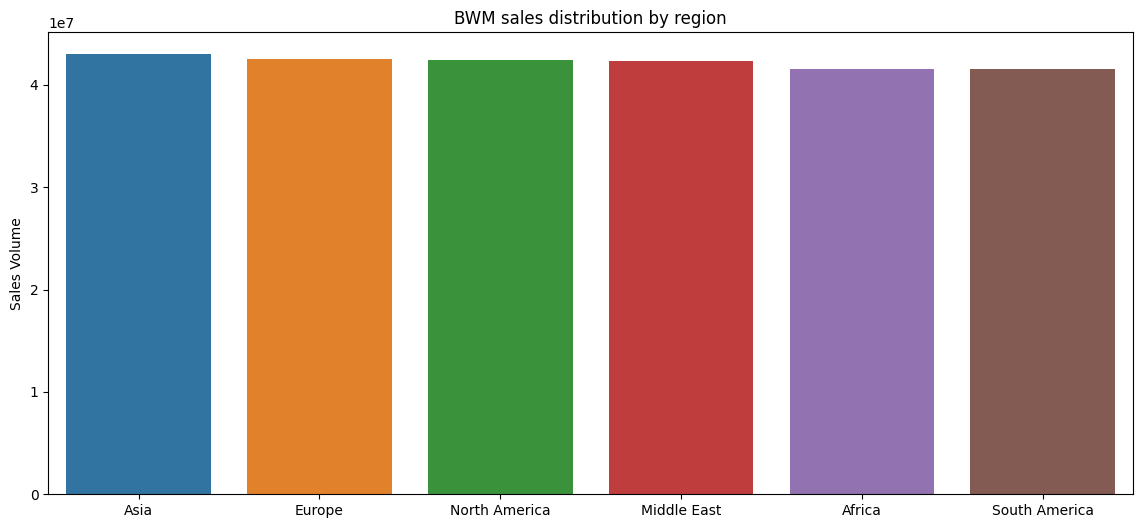

In [9]:
sum_sales_by_region = df.groupby('Region')['Sales_Volume'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(14,6))
sns.barplot(data=sum_sales_by_region,
            x='Region',
            y='Sales_Volume',
            hue= 'Region',
            palette='tab10'
            )

plt.title('BWM sales distribution by region')
plt.xlabel('')
plt.ylabel('Sales Volume')
plt.show()

Top BMW models  

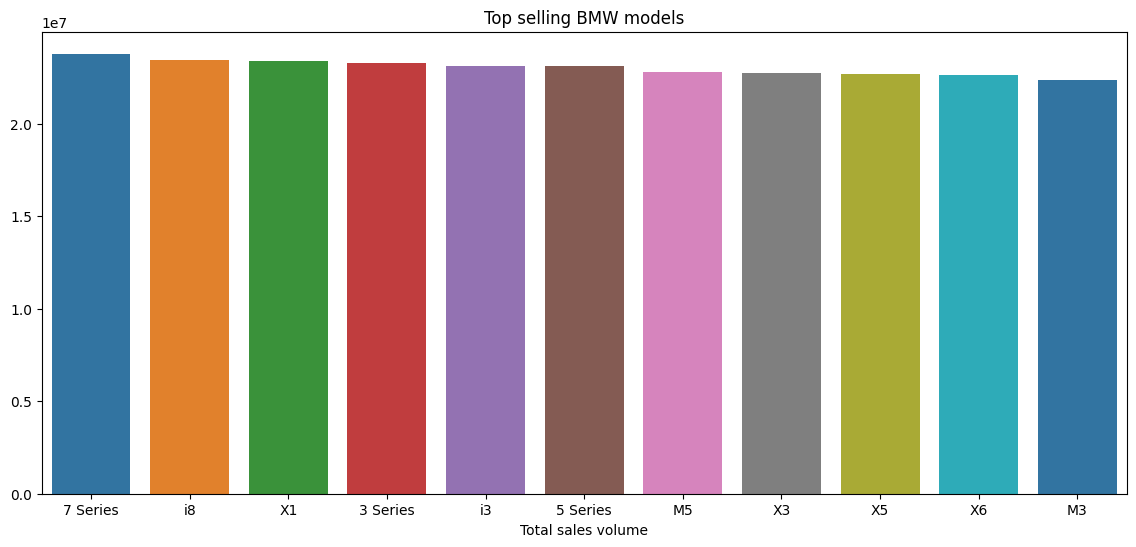

In [10]:
top_model = df.groupby('Model')['Sales_Volume'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(14,6))

sns.barplot(data=top_model,
            x='Model',
            y='Sales_Volume',
            hue= 'Model',
            palette='tab10',
            legend=False
            )
plt.title('Top selling BMW models')
plt.xlabel('Total sales volume')
plt.ylabel('')
plt.show()

Fuel type distribution

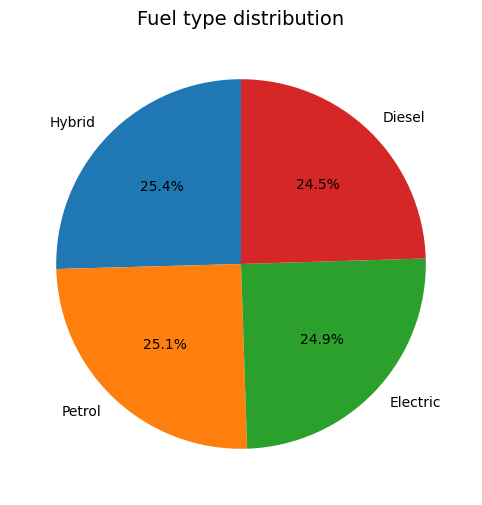

In [11]:
plt.figure(figsize=(10,6))

df['Fuel_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)

plt.title('Fuel type distribution', fontsize= 14)
plt.ylabel('')
plt.show()

Heatmap

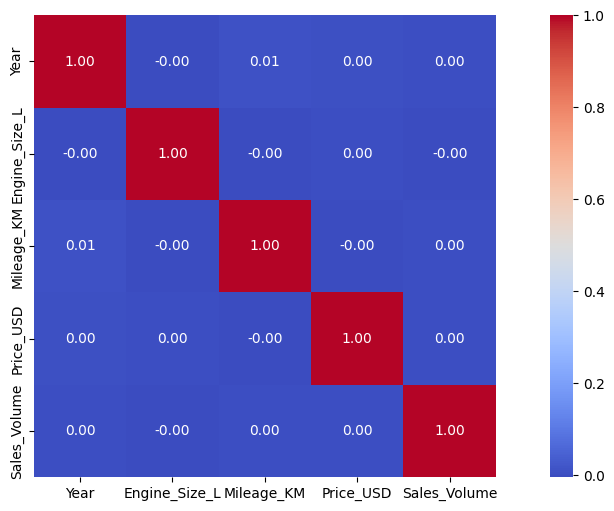

In [12]:
if len(num_cols) >= 2:
    plt.figure(figsize= (14,6))
    corr = df[num_cols].corr()
    sns.heatmap(corr, 
                annot=True, 
                cmap= 'coolwarm', 
                fmt= '.2F', 
                square= True
                )
    plt.show()